# Task 5 : Exploratory Data Analysis - Sports

**Importing the required library**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## Datasets On Matches played and Deliveries

**Dataset-1 Matches played from 2008 to 2019**

In [2]:
Matches = pd.read_csv("matches.csv")
Matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [3]:
Matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

**Dataset-2 Deliveries information supporting above dataset**

In [4]:
deliveries = pd.read_csv("deliveries.csv")
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [5]:
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

**Dataset-3: Merge the Datasets to gain more insights from the Data**

In [6]:
merge = pd.merge(deliveries , Matches , left_on = 'match_id' , right_on = 'id')
merge.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN


In [7]:
merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 179078 entries, 0 to 179077
Data columns (total 39 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

## Preprocessing Data in Matches dataset 

In [8]:
# Preprocessing of Data
Matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [9]:
#Checking if we have any repeated entries
Matches.id.is_unique 

True

In [10]:
#setting id as index
Matches.set_index('id' , inplace = True) 

In [11]:
# Non-categorical or Numeric Data
Matches.describe()

,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000
mean,2013.444444,0.025132,13.283069,3.350529
std,3.366895,0.156630,23.471144,3.387963
min,2008.000000,0.000000,0.000000,0.000000
25%,2011.000000,0.000000,0.000000,0.000000
50%,2013.000000,0.000000,0.000000,4.000000
75%,2016.000000,0.000000,19.000000,6.000000
max,2019.000000,1.000000,146.000000,10.000000


In [12]:
# Categorical Data
Matches.describe(include = 'object')

,city,date,team1,team2,toss_winner,toss_decision,result,winner,player_of_match,venue,umpire1,umpire2,umpire3
count,749,756,756,756,756,756,756,752,752,756,754,754,119
unique,32,546,15,15,15,2,3,15,226,41,61,65,25
top,Mumbai,2011-04-17,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,field,normal,Mumbai Indians,CH Gayle,Eden Gardens,HDPK Dharmasena,C Shamshuddin,Nitin Menon
freq,101,2,101,95,98,463,743,109,21,77,73,57,10


### Dealing with Missing Values: 

In [13]:
# Finding No. of Missing Values
Matches.isnull().sum().sort_values(ascending=False)

umpire3            637
city                 7
winner               4
player_of_match      4
umpire2              2
umpire1              2
venue                0
win_by_wickets       0
win_by_runs          0
season               0
result               0
toss_decision        0
toss_winner          0
team2                0
team1                0
date                 0
dl_applied           0
dtype: int64

**Inference:**
We have 637 missing in umpire3   
7 missing in city    
4 missing in winner     
4 mssing in player_of_match      
2 missing in umpire1 and umpire2     

In [14]:
# Filling the Missing Values of City Column
Matches[Matches.city.isnull()] [['city' , 'venue']]

,city,venue
id,,
462,NaN,Dubai International Cricket Stadium
463,NaN,Dubai International Cricket Stadium
467,NaN,Dubai International Cricket Stadium
469,NaN,Dubai International Cricket Stadium
470,NaN,Dubai International Cricket Stadium
475,NaN,Dubai International Cricket Stadium
477,NaN,Dubai International Cricket Stadium


In [15]:
# Fill missing values with Dubai
Matches.city = Matches.city.fillna('Dubai')

In [16]:
# umpire1 and umpire2 columns have two missing values each
Matches[(Matches.umpire1.isnull()) | (Matches.umpire2.isnull())]

,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
id,,,,,,,,,,,,,,,,,
5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN


In [17]:
#Simply drop these 2 rows
Matches.dropna(subset='umpire1', inplace = True)

In [18]:
# Umpire3 is missing from most of the matches, hence drop umpire3
Matches = Matches.drop('umpire3' , axis = 1)

In [19]:
Matches.isnull().sum().sort_values(ascending=False)

winner             4
player_of_match    4
season             0
city               0
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
win_by_runs        0
win_by_wickets     0
venue              0
umpire1            0
umpire2            0
dtype: int64

In [20]:
#Checking rows with missing value in winner
Matches[Matches.winner.isnull()].head()

,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
id,,,,,,,,,,,,,,,,
301,2011,Delhi,2011-05-21,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,no result,0,NaN,0,0,NaN,Feroz Shah Kotla,SS Hazare,RJ Tucker
546,2015,Bangalore,2015-04-29,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,JD Cloete,PG Pathak
571,2015,Bangalore,2015-05-17,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,HDPK Dharmasena,K Srinivasan
11340,2019,Bengaluru,30/04/19,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M. Chinnaswamy Stadium,Nigel Llong,Ulhas Gandhe


In [21]:
#Again we can drop these rows to remove missing values in winner and player_of_match as they overlap
Matches.dropna(subset='winner', inplace = True)

In [22]:
#Finally 
Matches.isnull().sum().sort_values(ascending=False)

season             0
city               0
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             0
win_by_runs        0
win_by_wickets     0
player_of_match    0
venue              0
umpire1            0
umpire2            0
dtype: int64

# Data Visualization of Matches Dataset : 

**Number of Matches in Different Cities**

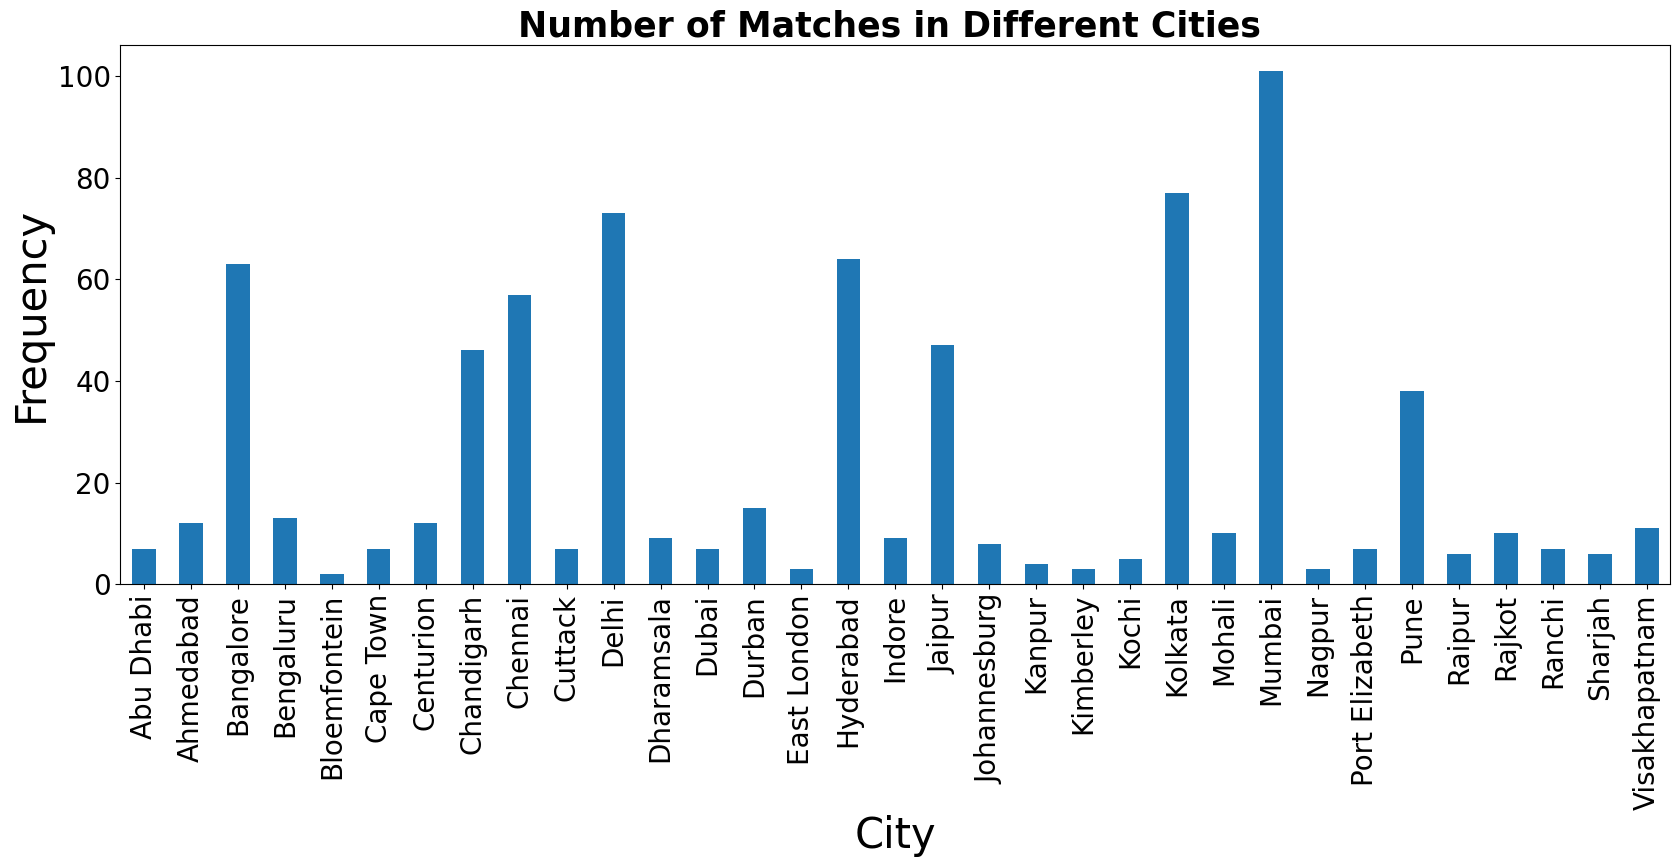

In [23]:
# Plotting venues along with cities
venue_city = pd.crosstab(Matches['city'] , Matches['venue'])
venue_city.replace(1 , inplace = True)

# Adding a column by summing each Columns
venue_city['count'] = venue_city.sum(axis = 'columns')

# Keep last column = count
b = venue_city['count']

# Plotting
plt.figure(figsize = (20,7))
b.plot(kind = 'bar')
plt.title('Number of Matches in Different Cities ' , fontsize = 25 , fontweight = 'bold')
plt.xlabel('City' , size = 30)
plt.ylabel('Frequency' , size = 30)
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.show()

**Number of Matches in Played each Season**

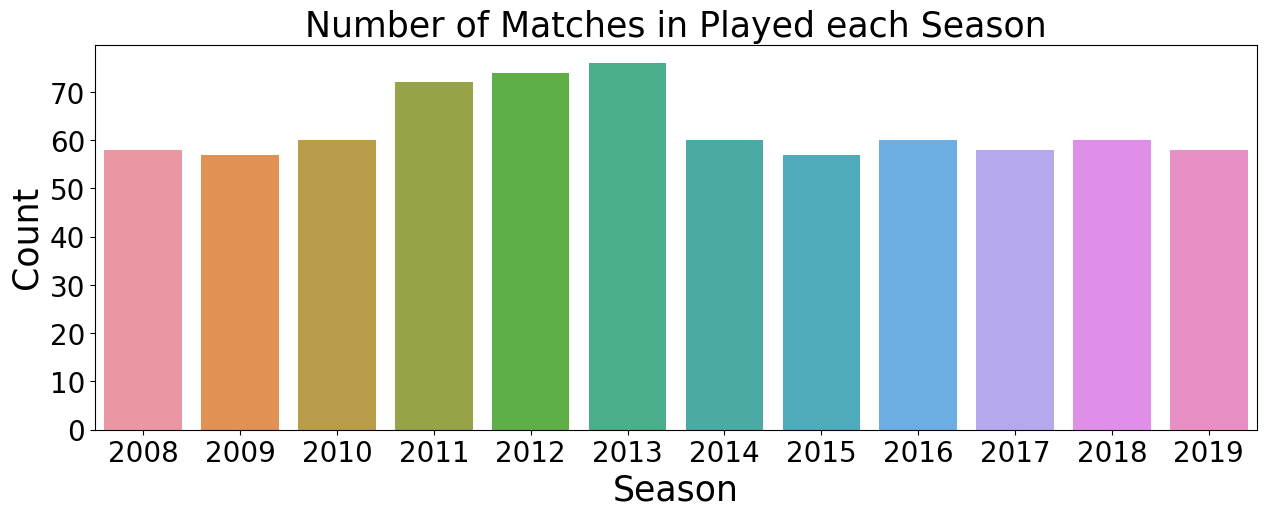

In [24]:
plt.figure(figsize = (15,5))
sns.countplot(x='season' , data = Matches)
plt.title('Number of Matches in Played each Season' , fontsize = 25 )
plt.xlabel('Season' , size = 25)
plt.ylabel('Count' , size = 25)
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.show()

**Number of teams particapting per season**

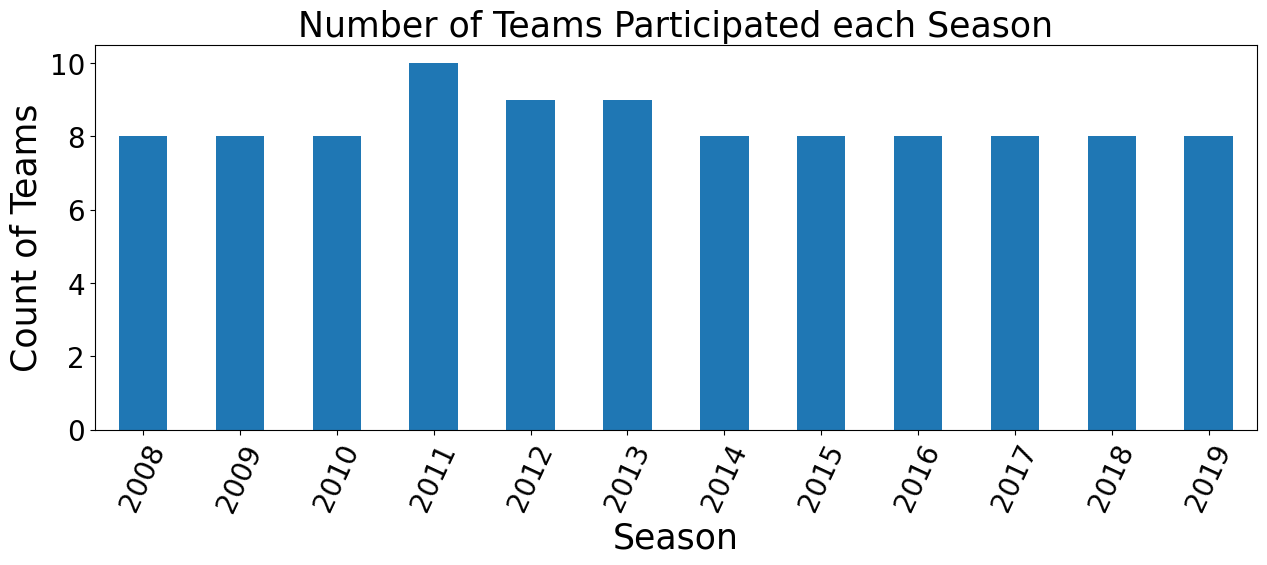

In [25]:
Matches.groupby('season')['team1'].nunique().plot(kind = 'bar' , figsize = (15,5))
plt.title('Number of Teams Participated each Season' , fontsize = 25)
plt.xlabel('Season' , size = 25)
plt.ylabel('Count of Teams' , size = 25)
plt.xticks(size = 20, rotation=65)
plt.yticks(size = 20)
plt.show()

**Most Popular Venues for Matches**

Text(0, 0.5, 'Venue')

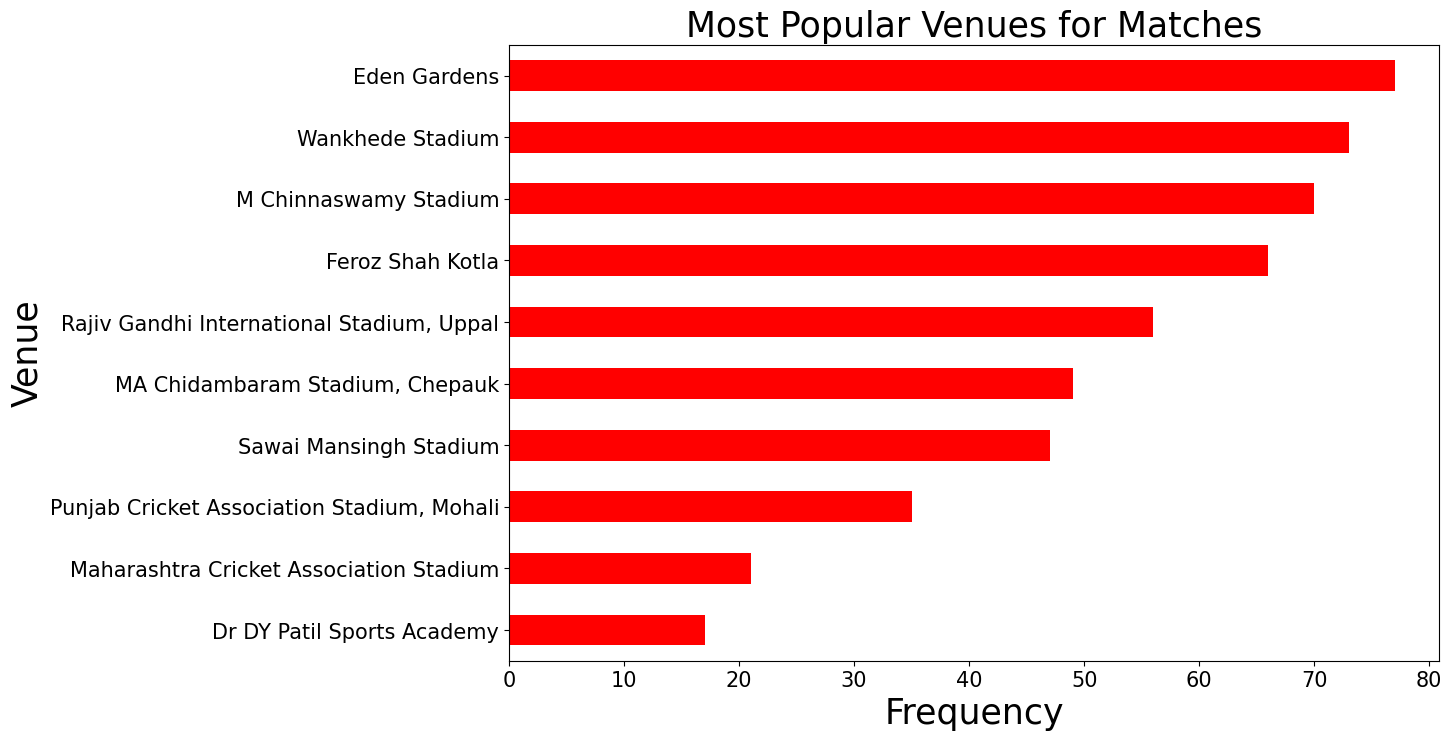

In [26]:
ven = Matches.venue.value_counts().sort_values(ascending = True).tail(10)
ven.plot(kind = 'barh' , figsize = (12,8) , fontsize = 15 , color = 'Red')
plt.title('Most Popular Venues for Matches' , fontsize = 25 )
plt.xlabel('Frequency' , size = 25)
plt.ylabel('Venue' , size = 25)

**Winners of IPL across all reasons**

In [27]:
# Creating a DataFrame with season and winner columns
winning_teams = Matches[['season' , 'winner']]

# Dictionary to get winners to each season
winners_team = {}
for i in sorted(winning_teams.season.unique()):
  winners_team[i] = winning_teams[winning_teams.season == i]['winner'].tail(1).values[0]

winners_of_IPL = pd.Series(winners_team)
winners_of_IPL = pd.DataFrame(winners_of_IPL , columns = ['team'])

[]

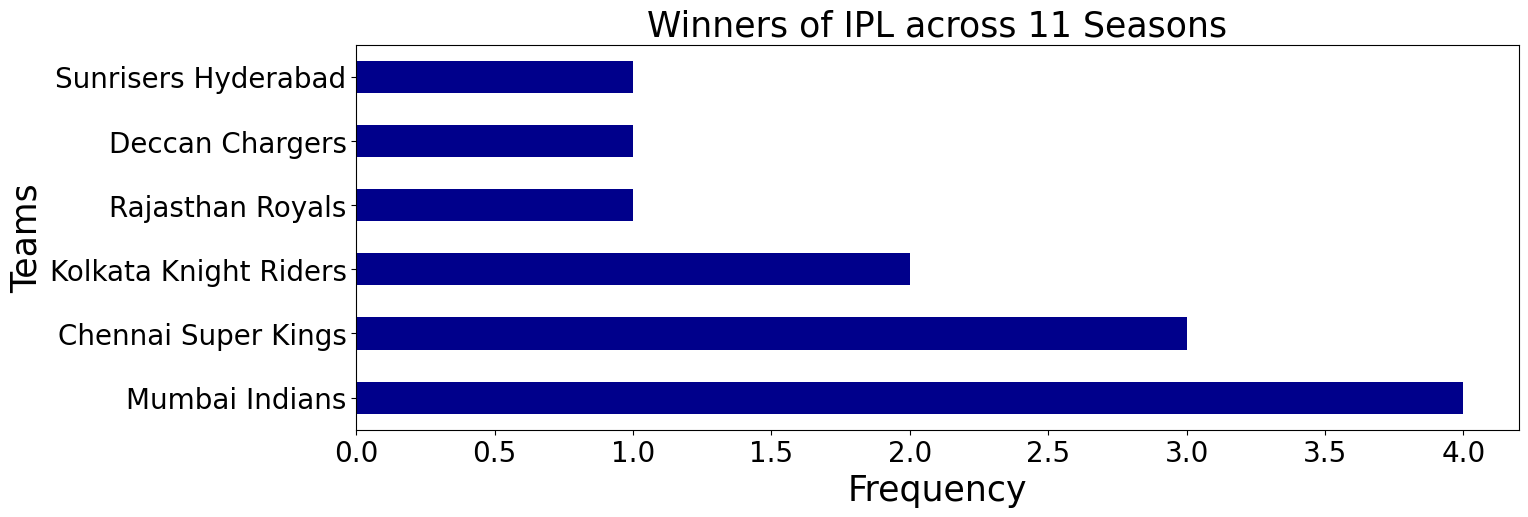

In [28]:
winners_of_IPL['team'].value_counts().plot(kind = 'barh' , figsize = (15,5) , color = 'Darkblue')
plt.title('Winners of IPL across 11 Seasons' , fontsize = 25)
plt.xlabel('Frequency' , size = 25)
plt.ylabel('Teams' , size = 25)
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.plot()

**Affect of Toss on Match Results**

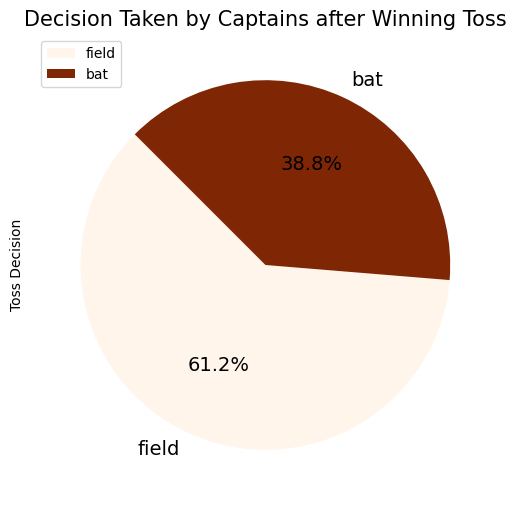

In [29]:
Matches['toss_decision'].value_counts().plot(kind = 'pie' , fontsize = 14 , autopct = '%3.1f%%' , figsize = (8,6) , 
                                             shadow = False , startangle = 135 , legend = True , cmap = 'Oranges')
plt.ylabel('Toss Decision')
plt.title('Decision Taken by Captains after Winning Toss' , fontsize = 15 )
plt.show()

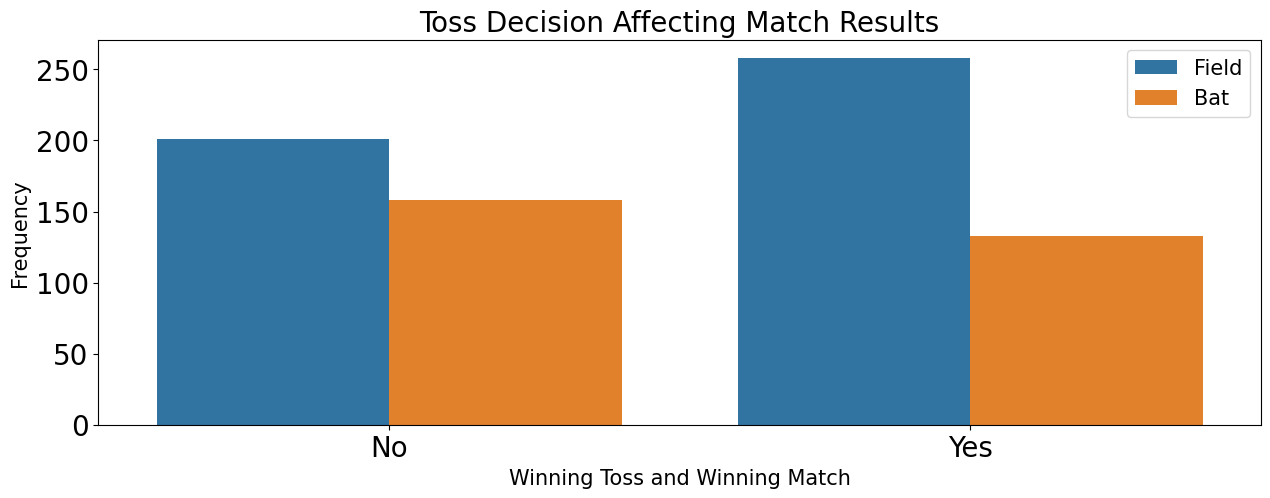

In [30]:
# Toss Decision affecting match results

Matches['toss_win_game_win'] = np.where((Matches.toss_winner == Matches.winner) , 'Yes' , 'No')
plt.figure(figsize = (15,5))
sns.countplot(x='toss_win_game_win' , data = Matches , hue = 'toss_decision')
plt.title('Toss Decision Affecting Match Results' , fontsize = 20)
plt.legend(labels=['Field','Bat'], fontsize=15)
plt.xlabel('Winning Toss and Winning Match' , size = 15)
plt.ylabel('Frequency' , size = 15)
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.show()

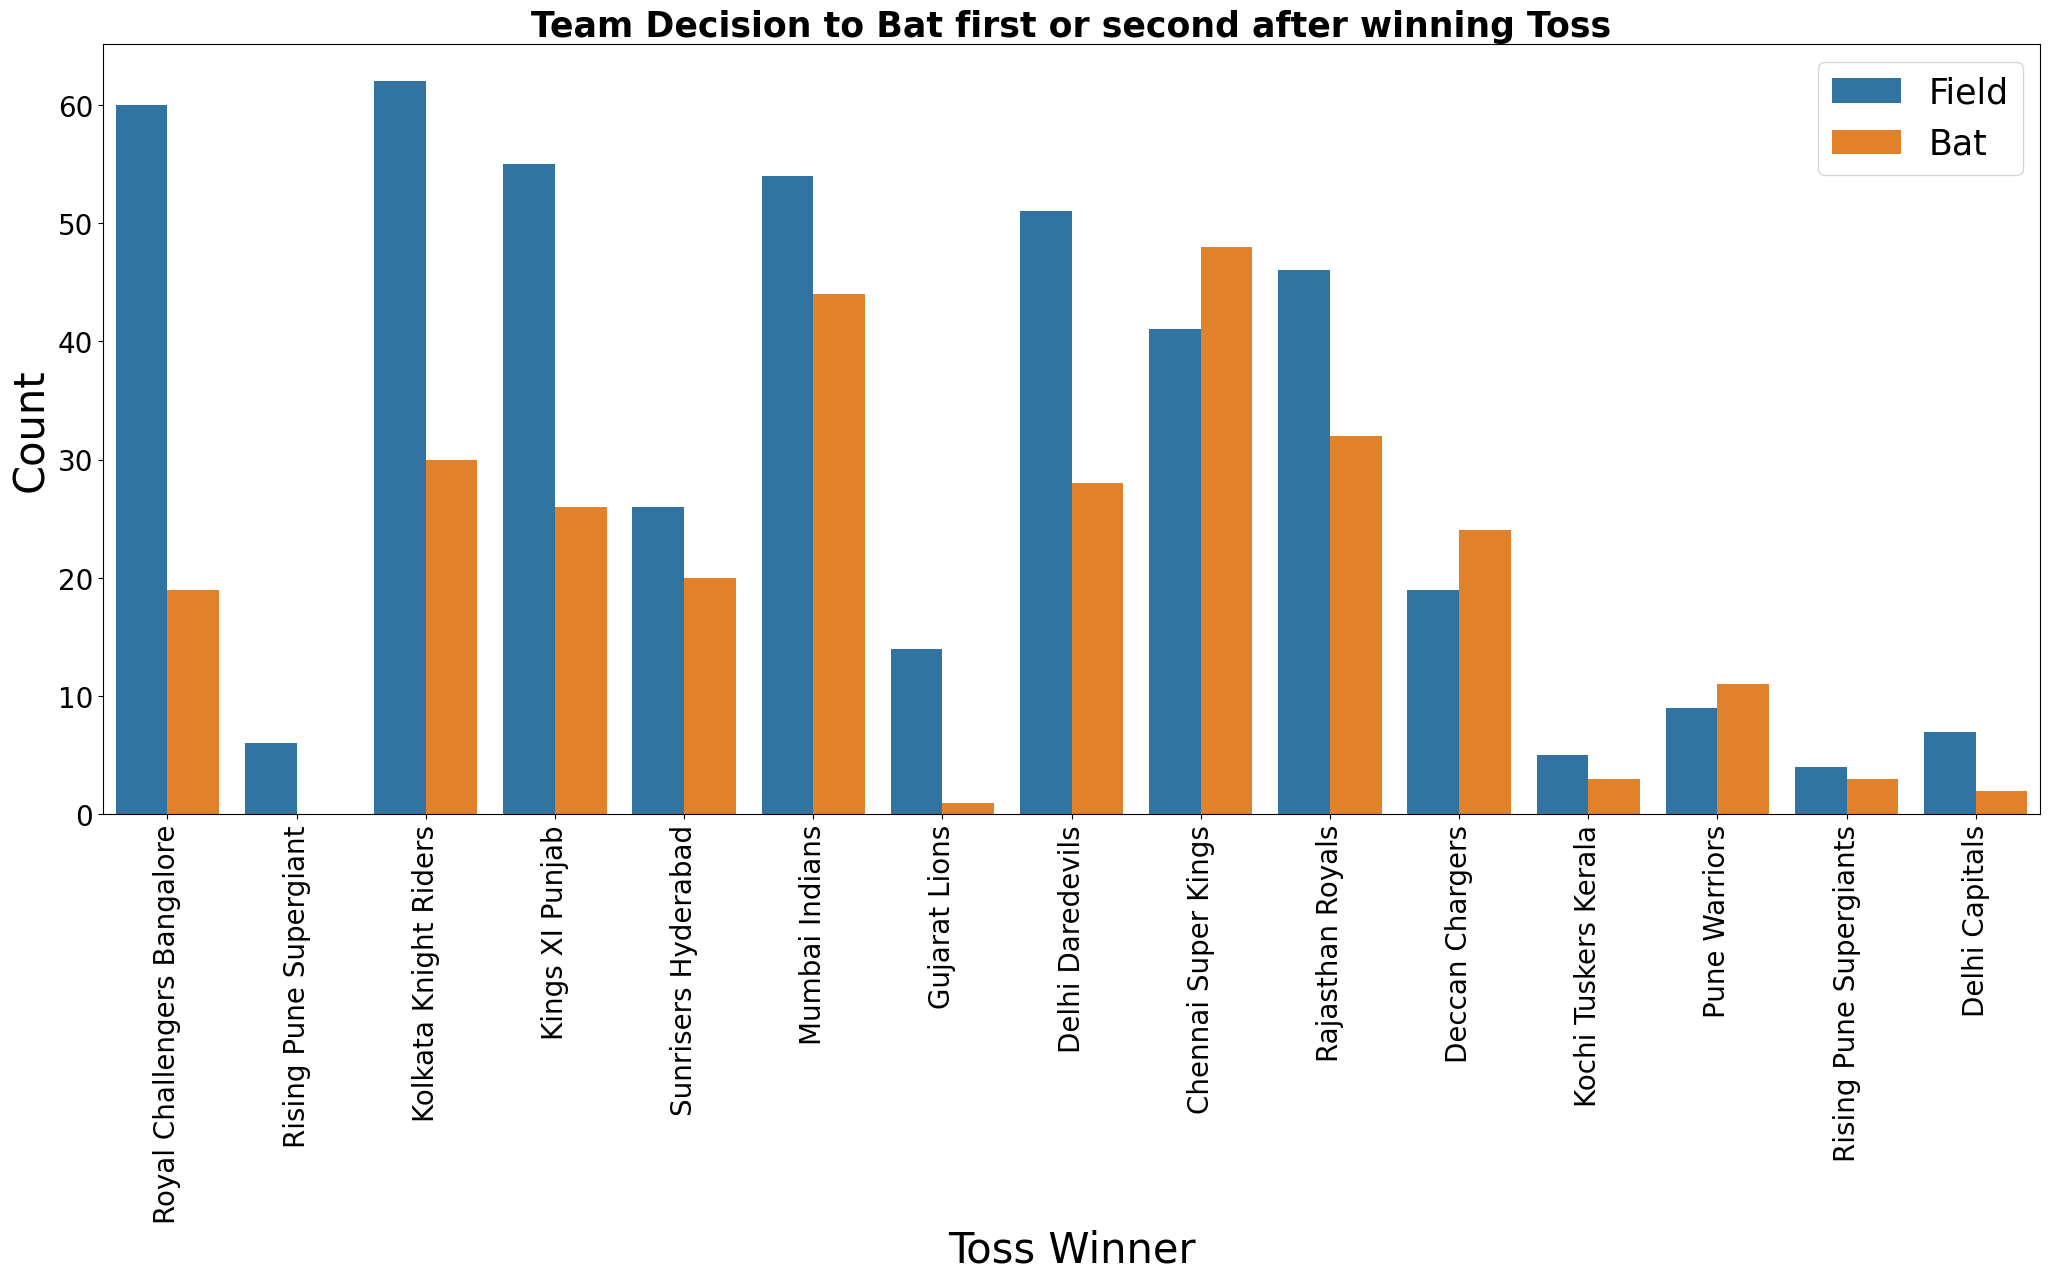

In [31]:
plt.figure(figsize = (25,10))
sns.countplot(x='toss_winner' , data = Matches , hue = 'toss_decision')
plt.title('Team Decision to Bat first or second after winning Toss' , fontsize = 25 , fontweight = 'bold')
plt.xlabel('Toss Winner' , size = 30)
plt.ylabel('Count' , size = 30)
plt.legend(labels=['Field','Bat'], fontsize=25)
plt.xticks(size = 20 , rotation = 90)
plt.yticks(size = 20)
plt.show()

**Top 10 Players with most Man of the Match Awards**

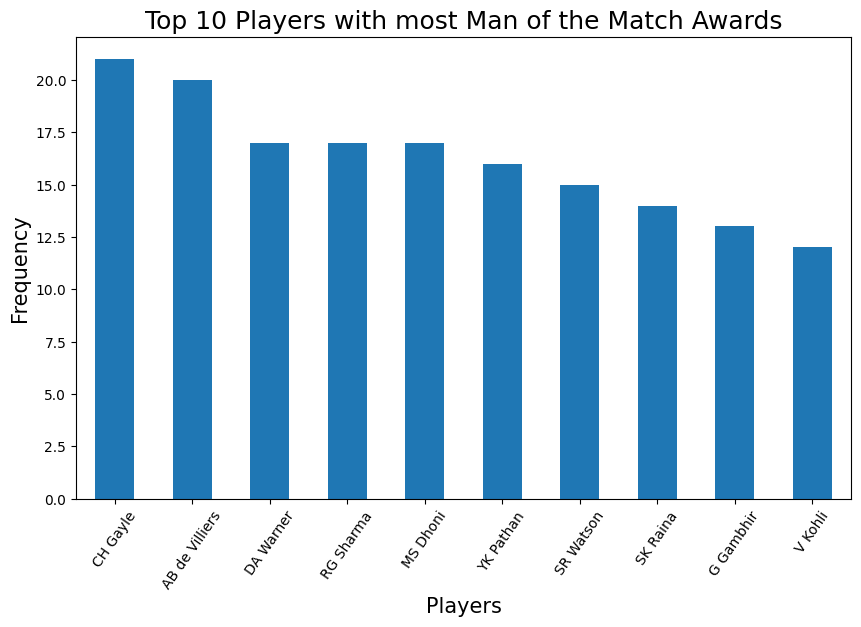

In [32]:
MoM = Matches['player_of_match'].value_counts()
MoM.head(10).plot(kind = 'bar' , figsize = (10,6) , fontsize = 15 )
plt.title('Top 10 Players with most Man of the Match Awards' , fontsize = 18 )
plt.xlabel('Players' , size = 15)
plt.ylabel('Frequency' , size = 15)
plt.xticks(size = 10 , rotation = 55)
plt.yticks(size = 10)
plt.show()

**How winning matches by fielding first varies across venues**

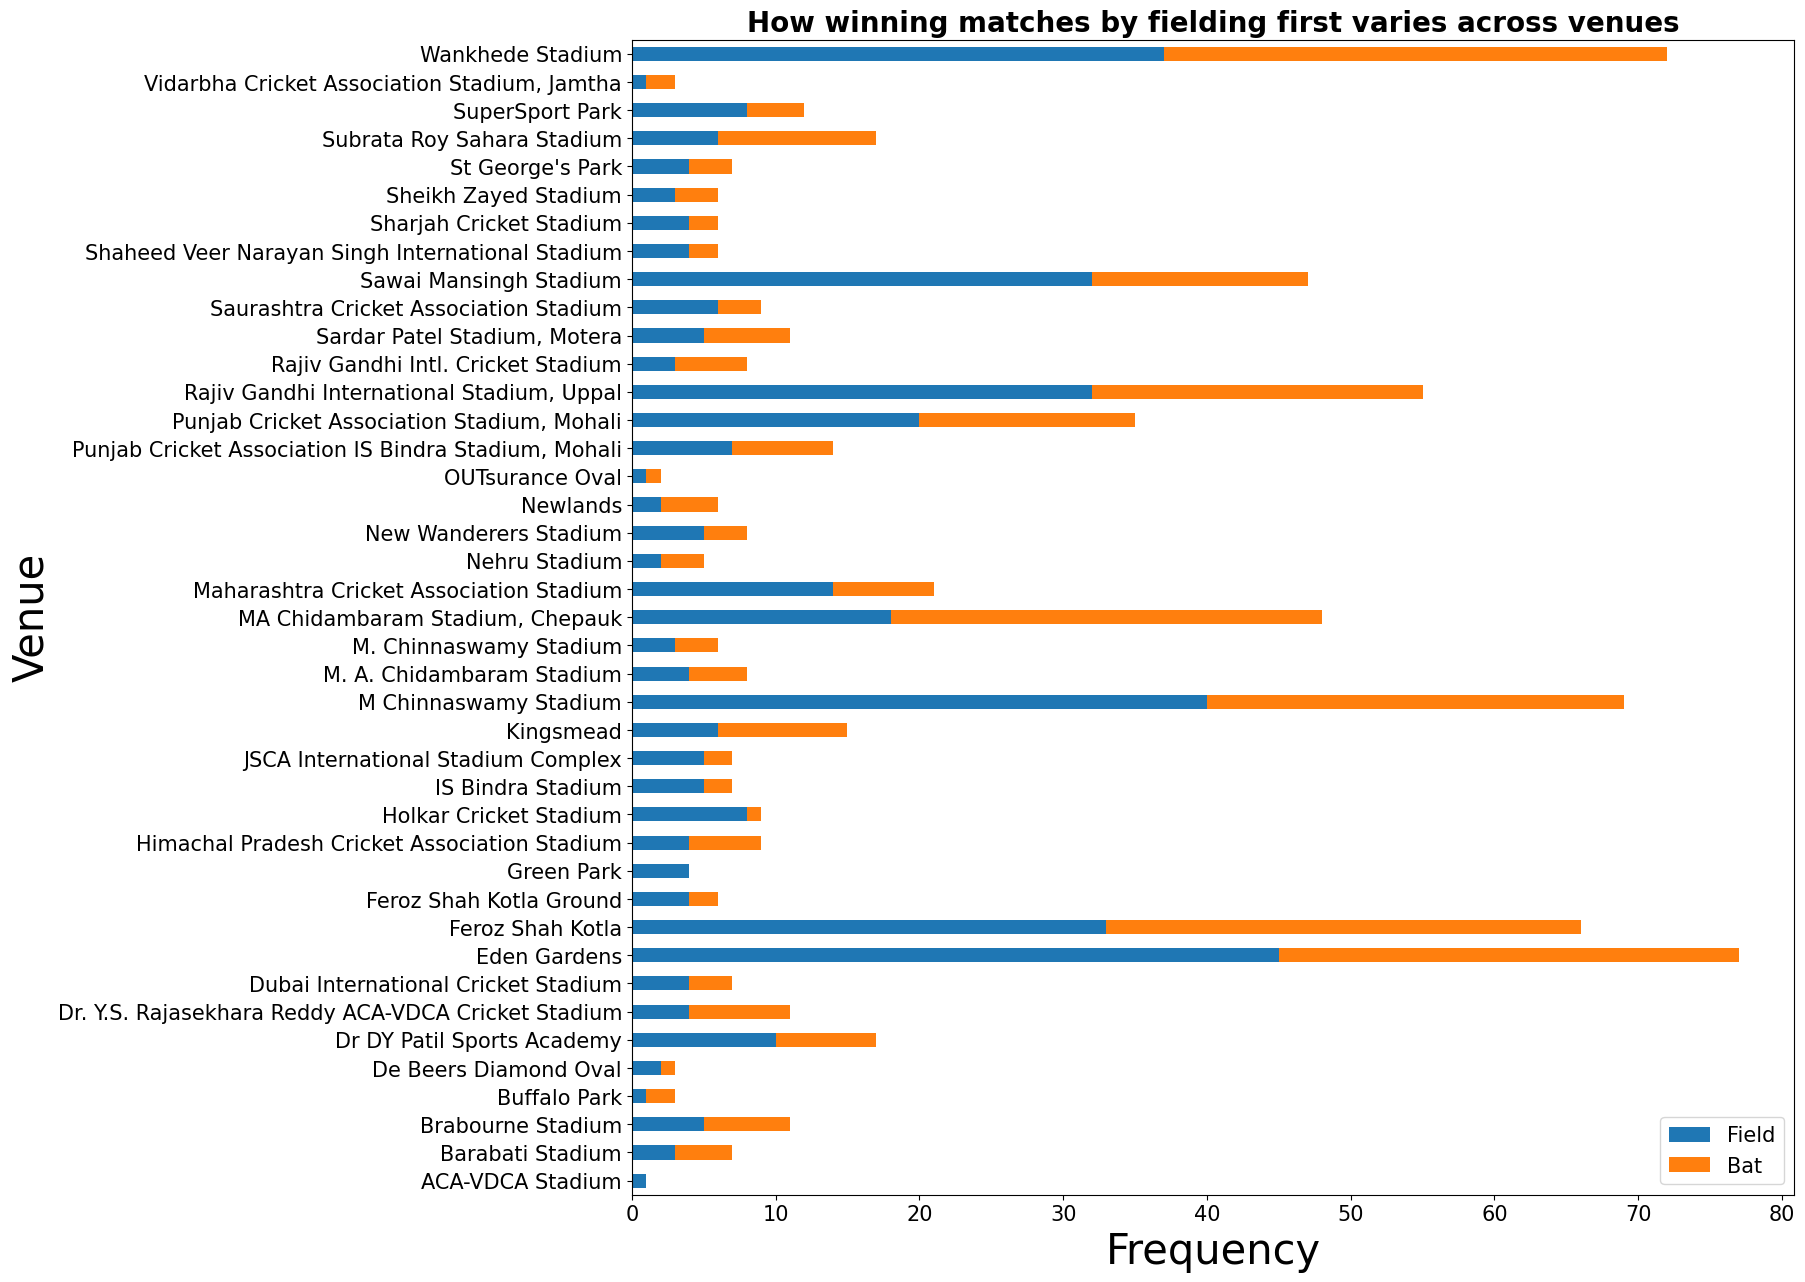

In [33]:
new_matches = Matches[Matches['result'] == 'normal']
new_matches['win_batting_first'] = np.where((new_matches.win_by_runs > 0) , 'Yes' , 'No')
new_matches.groupby('venue')['win_batting_first'].value_counts().unstack().plot(kind = 'barh' , stacked = True , figsize = (15,15))

plt.title('How winning matches by fielding first varies across venues' , fontsize = 20 , fontweight = 'bold')
plt.xlabel('Frequency' , size = 30)
plt.ylabel('Venue' , size = 30)
plt.legend(labels=['Field','Bat'], fontsize=15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.show()

**Is batting second advantageous across all years**

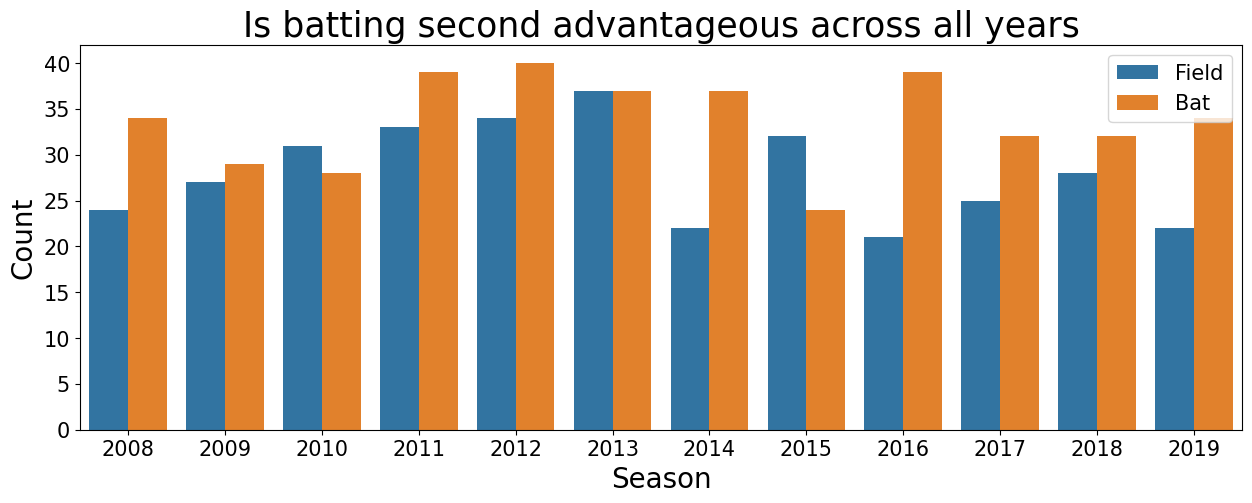

In [34]:
plt.figure(figsize = (15,5))
sns.countplot(x='season' , data = new_matches , hue = 'win_batting_first')
plt.title('Is batting second advantageous across all years' , fontsize = 25 )
plt.legend(labels=['Field','Bat'], fontsize=15)
plt.xlabel('Season' , size = 20)
plt.ylabel('Count' , size = 20)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.show()

# Data Visualization of Merge and Deliveries Dataset : 

**Runs over the Years**

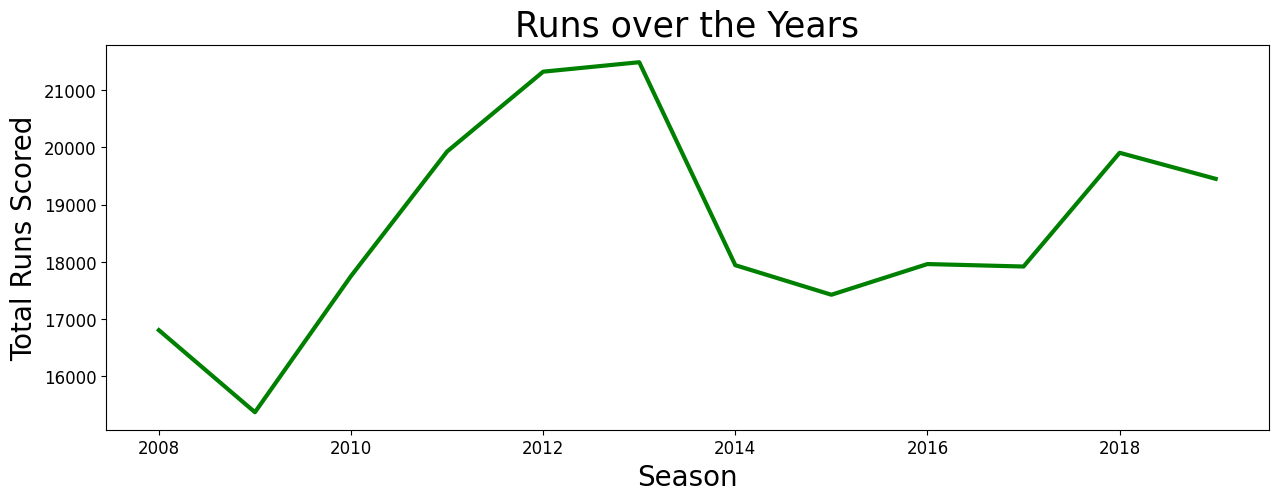

In [35]:
merge.groupby('season')['batsman_runs'].sum().plot(kind = 'line' , linewidth = 3 , figsize = (15,5) , color = 'Green')
plt.title('Runs over the Years' , fontsize = 25 )
plt.xlabel('Season' , size = 20)
plt.ylabel('Total Runs Scored' , size = 20)
plt.xticks(size = 12)
plt.yticks(size = 12)
plt.show()

**Top 10 Runs scorers of IPL**

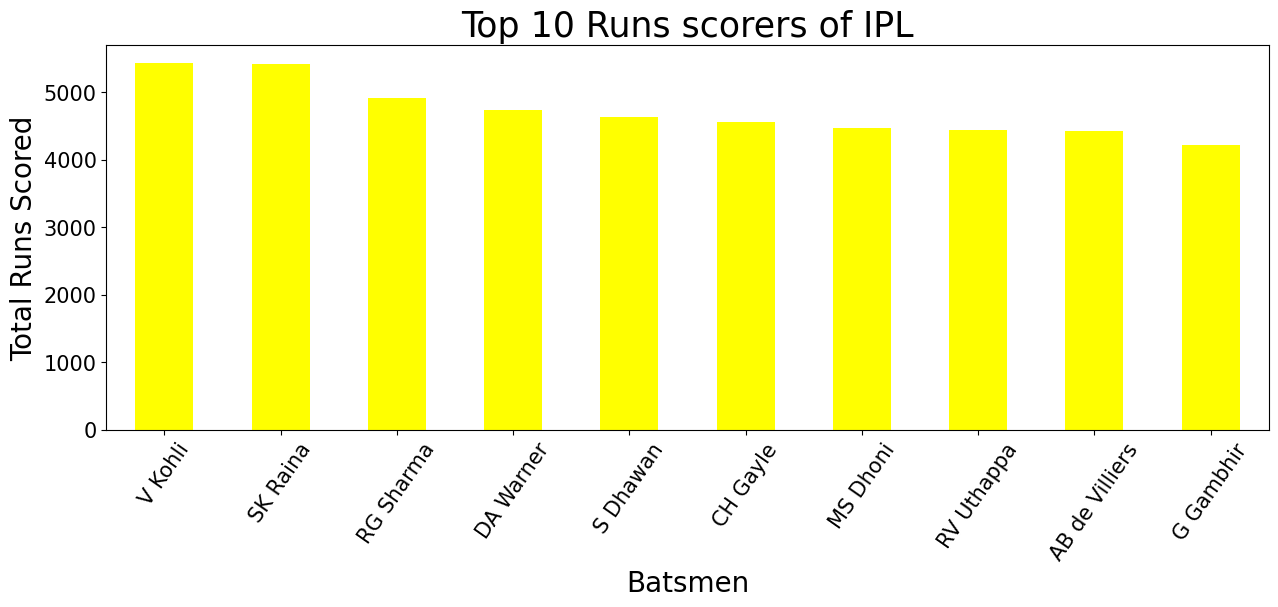

In [36]:
merge.groupby('batsman')['batsman_runs'].sum().sort_values(ascending = False).head(10).plot(kind = 'bar' , figsize = (15,5) , color = 'Yellow')
plt.title('Top 10 Runs scorers of IPL' , fontsize = 25)
plt.xlabel('Batsmen' , size = 20)
plt.ylabel('Total Runs Scored' , size = 20)
plt.xticks(size = 15 , rotation = 55)
plt.yticks(size = 15)
plt.show()

**Most Consistent Batsmen of IPL**

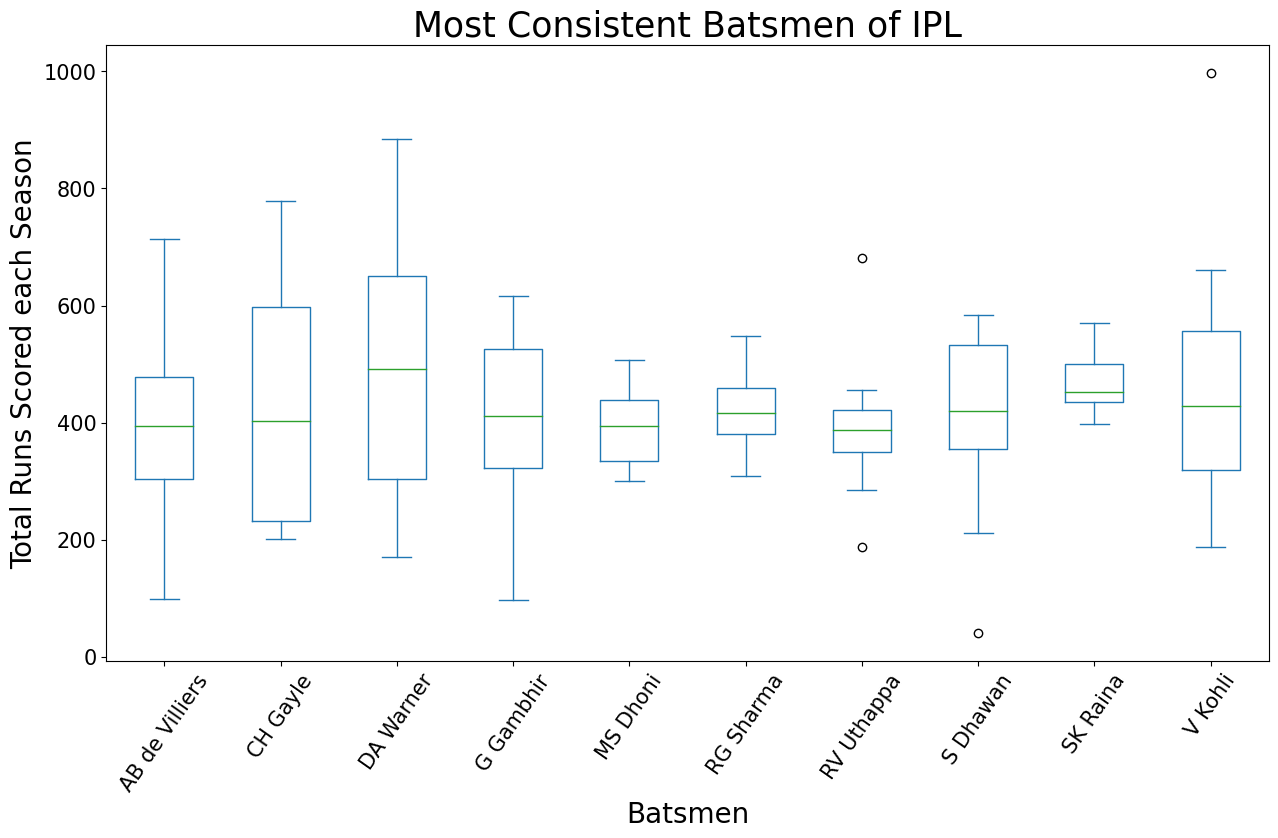

In [37]:
consistent_batsman = merge[merge.batsman.isin(['SK Raina' , 'V Kohli' , 'RG Sharma' , 'G Gambhir' , 'RV Uthappa' , 'S Dhawan' , 'CH Gayle' , 'MS Dhoni' , 'DA Warner' , 'AB de Villiers'])][['batsman' , 'season' , 'total_runs']]
consistent_batsman.groupby(['season' , 'batsman'])['total_runs'].sum().unstack().plot(kind = 'box' , figsize = (15,8))

plt.title('Most Consistent Batsmen of IPL' , fontsize = 25)
plt.xlabel('Batsmen' , size = 20)
plt.ylabel('Total Runs Scored each Season' , size = 20)
plt.xticks(size = 15 , rotation = 55)
plt.yticks(size = 15)
plt.show()

**Top 10 Wicket Takers of IPL**

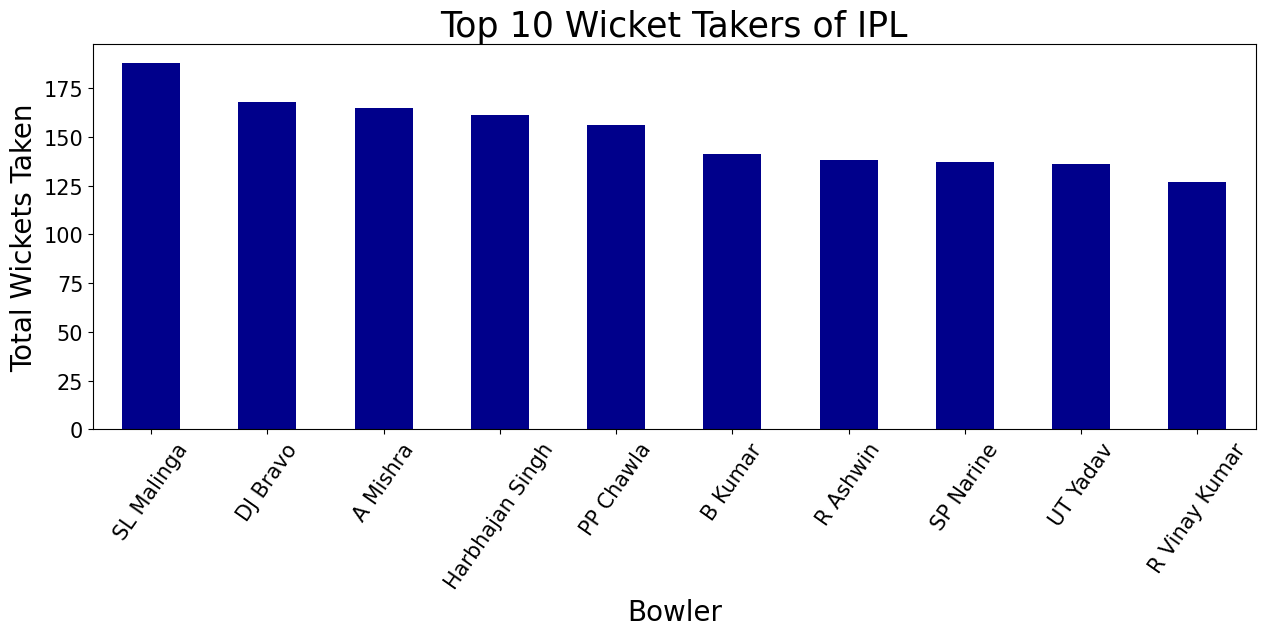

In [38]:
merge.groupby('bowler')['player_dismissed'].count().sort_values(ascending = False).head(10).plot(kind = 'bar' , figsize = (15,5) , color = 'Darkblue')
plt.title('Top 10 Wicket Takers of IPL' , fontsize = 25)
plt.xlabel('Bowler' , size = 20)
plt.ylabel('Total Wickets Taken' , size = 20)
plt.xticks(size = 15 , rotation = 55)
plt.yticks(size = 15)
plt.show()

**Batsmen with the best strike rate over the years**

In [39]:
no_of_balls = pd.DataFrame(merge.groupby('batsman')['ball'].count())  # Total no. of matches played by each batsman
runs = pd.DataFrame(merge.groupby('batsman')['batsman_runs'].sum()) # Total runs of each batsman
seasons = pd.DataFrame(merge.groupby('batsman')['season'].nunique())  # Season=1 implies played only 1 season

batsman_strike_rate = pd.DataFrame({'balls' : no_of_balls['ball'] , 'run' : runs['batsman_runs'] , 'season' : seasons['season']})
batsman_strike_rate.reset_index(inplace = True)

batsman_strike_rate['strike_rate'] = batsman_strike_rate['run']/batsman_strike_rate['balls']*100
highest_strike_rate = batsman_strike_rate[batsman_strike_rate.season.isin([10,11])][['season' , 'batsman' , 'strike_rate']].sort_values(by = 'strike_rate' , ascending = False)

highest_strike_rate.head(10)

,season,batsman,strike_rate
92,11,CH Gayle,145.640370
213,10,KA Pollard,141.751527
112,10,DA Warner,139.523249
444,11,SR Watson,136.945813
72,11,BB McCullum,127.332746
449,10,STR Binny,126.000000
118,11,DJ Bravo,125.565801
514,11,Yuvraj Singh,125.283190
53,10,AT Rayudu,124.058187
147,11,G Gambhir,119.835414


**Highest Strike Rates in IPL**

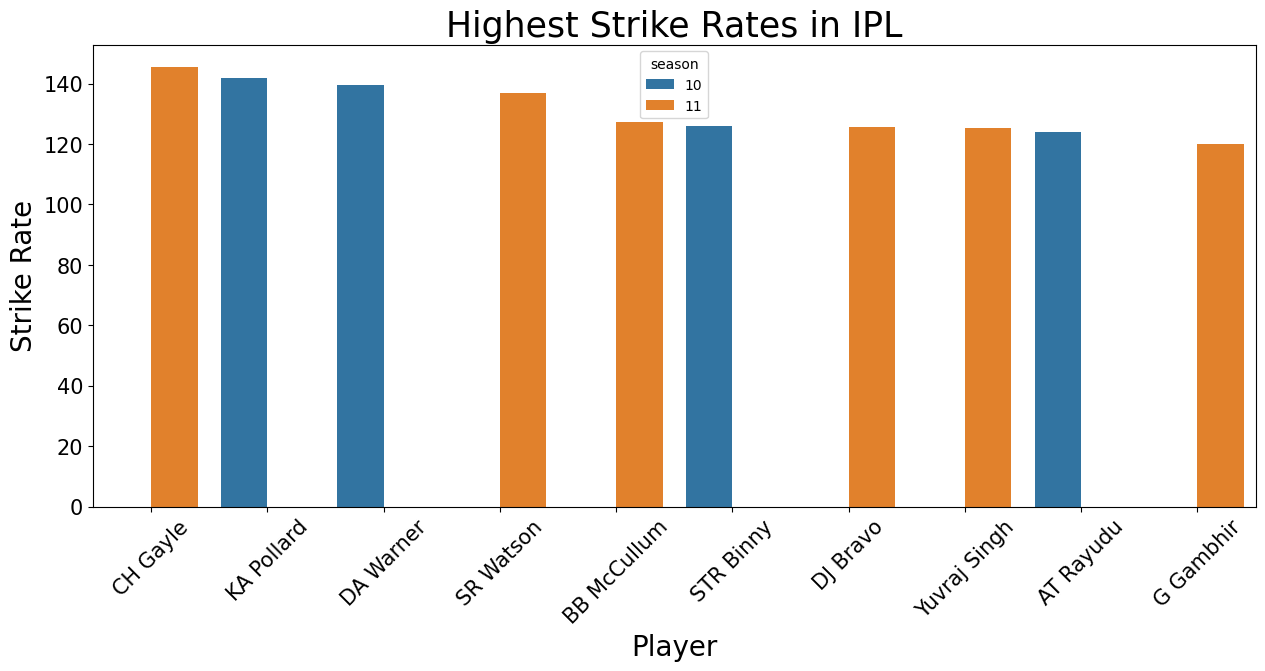

In [40]:
plt.figure(figsize = (15,6))
sns.barplot(x = 'batsman' , y = 'strike_rate' , data = highest_strike_rate.head(10) , hue = 'season')
plt.title('Highest Strike Rates in IPL' , fontsize = 25)
plt.xlabel('Player' , size = 20)
plt.ylabel('Strike Rate' , size = 20)
plt.xticks(size = 15 , rotation = 45)
plt.yticks(size = 15)
plt.show()

**Bowlers who Bowled Maximum Balls**

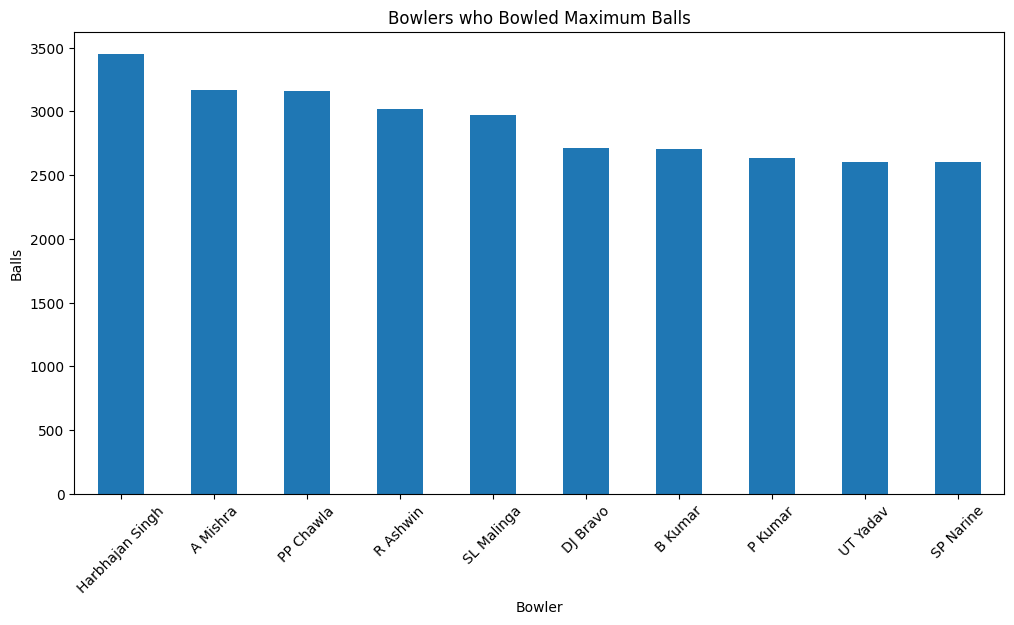

,Harbhajan Singh,A Mishra,PP Chawla,R Ashwin,SL Malinga,DJ Bravo,B Kumar,P Kumar,UT Yadav,SP Narine
bowler,3451,3172,3157,3016,2974,2711,2707,2637,2605,2600


In [41]:
balls = deliveries['bowler'].value_counts()[:10]
balls.plot(kind = 'bar' , title = 'Bowlers who Bowled Maximum Balls' , figsize = (12,6))
plt.xlabel('Bowler')
plt.ylabel('Balls')
plt.xticks(size = 10 , rotation = 45)
plt.yticks(size = 10)
plt.show()
balls = pd.DataFrame(balls)
balls.T

**Bowlers who have maximum number of dot balls**

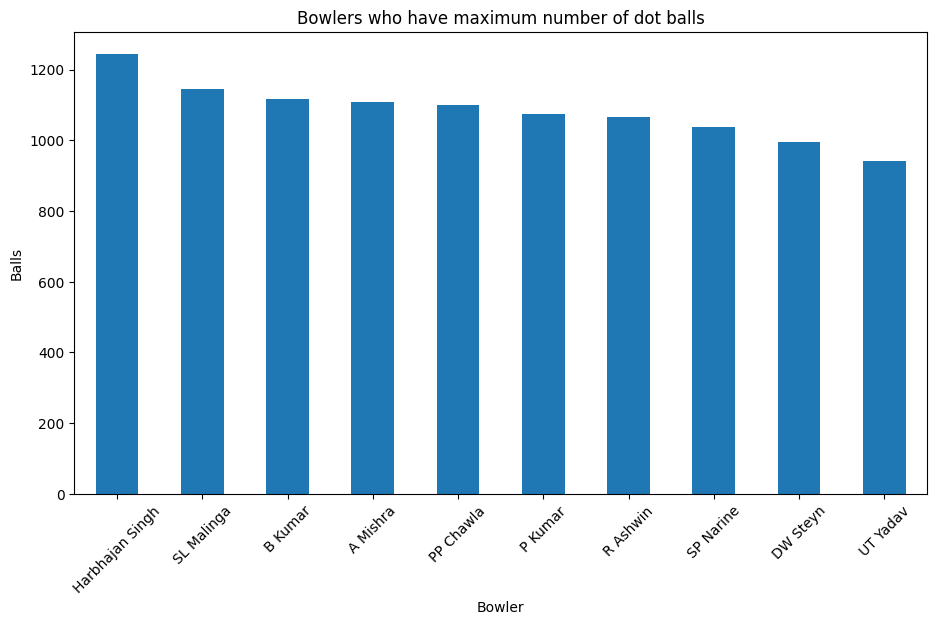

,Harbhajan Singh,SL Malinga,B Kumar,A Mishra,PP Chawla,P Kumar,R Ashwin,SP Narine,DW Steyn,UT Yadav
bowler,1244,1144,1116,1108,1100,1075,1067,1038,996,942


In [42]:
dot_ball = deliveries[deliveries['total_runs'] == 0]
dot_ball = dot_ball['bowler'].value_counts()[:10]
dot_ball.plot(kind = 'bar' , figsize=(11,6) , title = 'Bowlers who have maximum number of dot balls')

plt.xlabel('Bowler')
plt.ylabel('Balls')
plt.xticks(size = 10 , rotation = 45)
plt.yticks(size = 10)
plt.show()

dot_ball = pd.DataFrame(dot_ball)
dot_ball.T

**Bowlers who have bowled maximum number of extra balls**

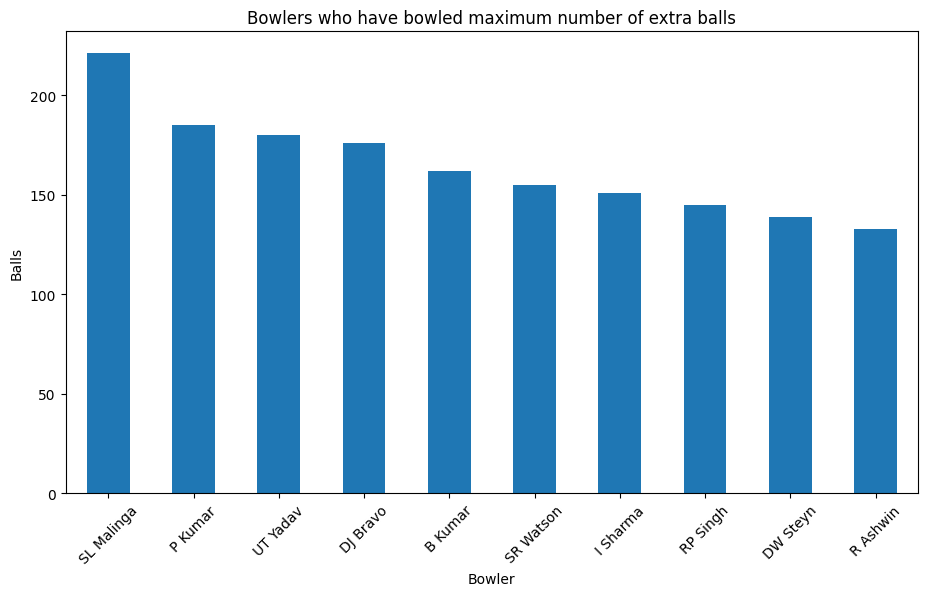

,SL Malinga,P Kumar,UT Yadav,DJ Bravo,B Kumar,SR Watson,I Sharma,RP Singh,DW Steyn,R Ashwin
bowler,221,185,180,176,162,155,151,145,139,133


In [43]:
extra = deliveries[deliveries['extra_runs'] != 0]['bowler'].value_counts()[:10]
extra.plot(kind = 'bar' , figsize=(11,6) , title = 'Bowlers who have bowled maximum number of extra balls')

plt.xlabel('Bowler')
plt.ylabel('Balls')
plt.xticks(size = 10 , rotation = 45)
plt.yticks(size = 10)
plt.show()

extra = pd.DataFrame(extra)
extra.T

**Bowlers who picked most wickets**

In [44]:
balls_bowled = pd.DataFrame(merge.groupby('bowler')['ball'].count())
wickets_taken = pd.DataFrame(merge[merge['dismissal_kind'] != 'no dismissal'].groupby('bowler')['dismissal_kind'].count())
seasons_played = pd.DataFrame(merge.groupby('bowler')['season'].nunique())
bowler_strike_rate = pd.DataFrame({'balls' : balls_bowled['ball'] , 'wickets' : wickets_taken['dismissal_kind'] , 
                                   'season' : seasons_played['season']})
bowler_strike_rate.reset_index(inplace = True)

In [45]:
bowler_strike_rate['strike_rate'] = bowler_strike_rate['balls'] / bowler_strike_rate['wickets']
def highlight_cols(s):
  color = 'lightgreen'
  return 'background-color : %s' % color

best_bowling_strike_rate = bowler_strike_rate[bowler_strike_rate['wickets'] > 50].sort_values(by = 'strike_rate' , ascending = True)
best_bowling_strike_rate.head().style.applymap(highlight_cols , subset = pd.IndexSlice[: , ['bowler' , 'wickets' , 'strike_rate']])

,bowler,balls,wickets,season,strike_rate
134,Imran Tahir,1249,82,6,15.231707
340,SL Malinga,2974,188,9,15.819149
93,DJ Bravo,2711,168,10,16.136905
9,A Nehra,1974,121,9,16.314050
225,MM Patel,1382,82,7,16.853659
